In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers
import pylab
import random

# Problem 2

Many macromolecules have multiple conformations that are local minima of their (free) enery function. In this problem, you'll model such situations and look at spontaneous (thermally induced) transitions between such "metastable'' states (**isomerization**).

# a)

Make a graph of the potential energy function 
    \begin{equation*}
        \frac{U}{k_b T} = 12\left(\frac{1}{4}\left(\frac{x-x_*}{40L}\right)^4\ - \frac{1}{2}\left(\frac{x-x_*}{40L}\right)^2\right)
    \end{equation*}
    where $0\leq x \leq 100L$ and $x_* = 50L$. Use this energy landscape to set up a random walk generalizing the one in problem 6.1 as follows:
* Use the stepping probabilities
\begin{equation*}
    \mathcal{P}_+ = \frac{1}{2}\left(1-\frac{\Delta U}{2\zeta D}\right)
\end{equation*}
where $\Delta U = L\frac{dU}{dx}$. Use the Einstein relation 
\begin{equation*}
    \zeta D = k_B T
\end{equation*}
to simplify the relation. 
* Implement hard walls at each end as in Problem 6.2, that us at $x=0$, replace the general expression for $\mathcal{P}_+$ by 1, and at $x=100L$ replace it by 0.
* It will be efficient to set up a look-up table: Create an array with all 101 of the $\mathcal{P}_+$ values, including the two exceptional ones just described. At each step of each simulation,, you can then just look up the Bernoulli trial parameter appropriate to the current position.  

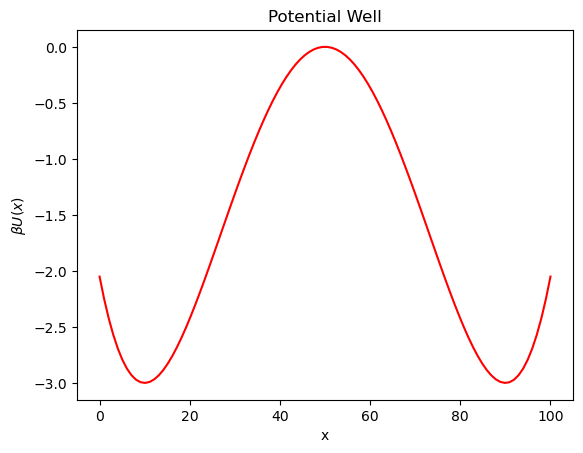

In [16]:
# Create plot
def p2_Potential(x):
    return 12*((1/4)*((x-50)/40)**4-(1/2)*((x-50)/40)**2)

x = np.linspace(0, 100, 100)
plt.plot(x, p2_Potential(x), color='red')
plt.title('Potential Well')
plt.xlabel('x')
plt.ylabel(r'$\beta U(x)$')
plt.show()

In [30]:
class RandomWalk():
    
    def __init__(self, x0):
        
        self.x0 = x0
        
    def p2_Force(self, x):
        return 12*((1/40)*((x-50)/40)**3-(1/40)*((x-50)/40))

    def prob_plus(self, x):
        return (1/2)*(1-(1/2)*self.p2_Force(x))
    
    def preformWalk(self, nsteps, plot = False):
        """
        Preform a random walk on a 1D potential well with nsteps.
        """
        
        self.nsteps = nsteps
        x = np.zeros(self.nsteps)
        x[0] = self.x0
        
        for i in range(1, self.nsteps):
            
            # Take a step
            if np.random.random() > self.prob_plus(x[i-1]):
                x[i] += 1
            else:
                x[i] -= 1
    
        
        if plot:
            pylab.title("Random Walk ($n = " + str(self.nsteps) + "$ steps)")
            t = np.linspace(0, nsteps, nsteps)
            pylab.plot(x, t)
            pylab.xlabel("x")
            pylab.ylabel("t")
            pylab.show()
            
        return x

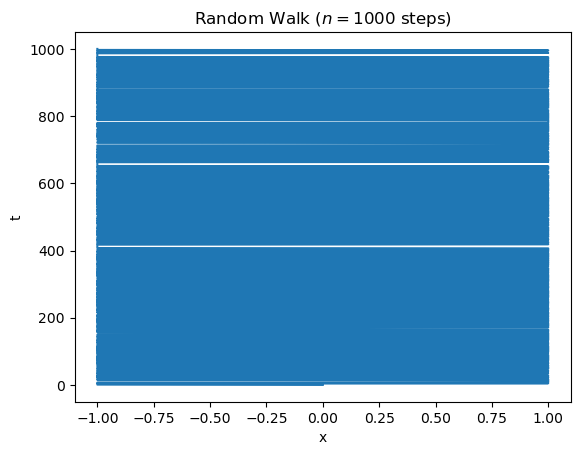

array([ 0., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,
        1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,
        1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1

In [32]:
walk = RandomWalk(0)
walk.preformWalk(1000, plot=True)

# b)

Generate many trajectories, all starting at the left hand potential minimum $x = 10L$. Let each one proceed for 7000 time steps. Some trajectories will cross $x_*$; choose a few such examples and make graphs of position vs time.